# Introduction

This notebook explores various machine learning models to predict the prices of H&M articles based on their characteristics.
We use a combination of preprocessing techniques including one-hot encoding and PCA for dimensionality reduction.
The models evaluated include KNN, Random Forest, Gradient Boosting, Bagging, and SVM.
Our goal is to identify the most accurate model to enhance H&M's pricing strategy.
The notebook also includes steps for hyperparameter tuning and a detailed analysis of model performance.

# Import necessary libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Set Display Options for Pandas

In [2]:
# Set display options for pandas
pd.set_option('display.max_columns', None)

### Load the dataset

In [3]:
df = pd.read_csv('../Data/df.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104752 entries, 0 to 104751
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   article_id                    104752 non-null  int64  
 1   perceived_colour_master_id    104752 non-null  int64  
 2   perceived_colour_master_name  104752 non-null  object 
 3   product_type_no               104752 non-null  int64  
 4   product_type_name             104752 non-null  object 
 5   price                         104752 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB
None


# One-hot encoding for categorical variables

In [4]:
# One-hot encoding for categorical variables
colour = pd.get_dummies(df, columns=['perceived_colour_master_name'])
product = pd.get_dummies(df, columns=['product_type_name'])

# Merge the dataframes

In [5]:
# Merge the dataframes
merged_df = pd.merge(colour, product, on='article_id', how='inner')
print(merged_df.columns)

Index(['article_id', 'perceived_colour_master_id_x', 'product_type_no_x',
       'product_type_name', 'price_x', 'perceived_colour_master_name_Beige',
       'perceived_colour_master_name_Black',
       'perceived_colour_master_name_Blue',
       'perceived_colour_master_name_Bluish Green',
       'perceived_colour_master_name_Brown',
       ...
       'product_type_name_Vest top', 'product_type_name_Wallet',
       'product_type_name_Washing bag', 'product_type_name_Watch',
       'product_type_name_Waterbottle', 'product_type_name_Wedge',
       'product_type_name_Weekend/Gym bag',
       'product_type_name_Wireless earphone case',
       'product_type_name_Wood balls', 'product_type_name_Zipper head'],
      dtype='object', length=158)


# PCA for accesories column

## Select the product columns for PCA

In [6]:
# Select the product columns for PCA
product_columns = [
    'product_type_name_Accessories set', 'product_type_name_Alice band', 'product_type_name_Baby Bib',
    'product_type_name_Backpack', 'product_type_name_Bag', 'product_type_name_Ballerinas',
    'product_type_name_Beanie', 'product_type_name_Belt', 'product_type_name_Bikini top',
    'product_type_name_Blanket', 'product_type_name_Blazer', 'product_type_name_Blouse',
    'product_type_name_Bodysuit', 'product_type_name_Bootie', 'product_type_name_Boots',
    'product_type_name_Bra', 'product_type_name_Bra extender', 'product_type_name_Bracelet',
    'product_type_name_Braces', 'product_type_name_Bucket hat', 'product_type_name_Bumbag',
    'product_type_name_Cap', 'product_type_name_Cap/peaked', 'product_type_name_Cardigan',
    'product_type_name_Chem. cosmetics', 'product_type_name_Clothing mist', 'product_type_name_Coat',
    'product_type_name_Costumes', 'product_type_name_Cross-body bag', 'product_type_name_Cushion',
    'product_type_name_Dog Wear', 'product_type_name_Dog wear', 'product_type_name_Dress',
    'product_type_name_Dungarees', 'product_type_name_Earring', 'product_type_name_Earrings',
    'product_type_name_Eyeglasses', 'product_type_name_Felt hat', 'product_type_name_Fine cosmetics',
    'product_type_name_Flat shoe', 'product_type_name_Flat shoes', 'product_type_name_Flip flop',
    'product_type_name_Garment Set', 'product_type_name_Giftbox', 'product_type_name_Gloves',
    'product_type_name_Hair clip', 'product_type_name_Hair string', 'product_type_name_Hair ties',
    'product_type_name_Hair/alice band', 'product_type_name_Hairband', 'product_type_name_Hat/beanie',
    'product_type_name_Hat/brim', 'product_type_name_Headband', 'product_type_name_Heeled sandals',
    'product_type_name_Heels', 'product_type_name_Hoodie', 'product_type_name_Jacket',
    'product_type_name_Jumpsuit/Playsuit', 'product_type_name_Keychain', 'product_type_name_Kids Underwear top',
    'product_type_name_Leg warmers', 'product_type_name_Leggings/Tights', 'product_type_name_Long John',
    'product_type_name_Marker pen', 'product_type_name_Mobile case', 'product_type_name_Moccasins',
    'product_type_name_Necklace', 'product_type_name_Night gown', 'product_type_name_Nipple covers',
    'product_type_name_Other accessories', 'product_type_name_Other shoe', 'product_type_name_Outdoor Waistcoat',
    'product_type_name_Outdoor overall', 'product_type_name_Outdoor trousers', 'product_type_name_Polo shirt',
    'product_type_name_Pre-walkers', 'product_type_name_Pumps', 'product_type_name_Pyjama bottom',
    'product_type_name_Pyjama jumpsuit/playsuit', 'product_type_name_Pyjama set', 'product_type_name_Ring',
    'product_type_name_Robe', 'product_type_name_Sandals', 'product_type_name_Sarong', 'product_type_name_Scarf',
    'product_type_name_Sewing kit', 'product_type_name_Shirt', 'product_type_name_Shorts',
    'product_type_name_Shoulder bag', 'product_type_name_Side table', 'product_type_name_Skirt',
    'product_type_name_Sleep Bag', 'product_type_name_Sleeping sack', 'product_type_name_Slippers',
    'product_type_name_Sneakers', 'product_type_name_Socks', 'product_type_name_Soft Toys',
    'product_type_name_Stain remover spray', 'product_type_name_Straw hat', 'product_type_name_Sunglasses',
    'product_type_name_Sweater', 'product_type_name_Swimsuit', 'product_type_name_Swimwear bottom',
    'product_type_name_Swimwear set', 'product_type_name_Swimwear top', 'product_type_name_T-shirt',
    'product_type_name_Tailored Waistcoat', 'product_type_name_Tie', 'product_type_name_Top',
    'product_type_name_Tote bag', 'product_type_name_Towel', 'product_type_name_Toy',
    'product_type_name_Trousers', 'product_type_name_Umbrella', 'product_type_name_Underdress',
    'product_type_name_Underwear Tights', 'product_type_name_Underwear body', 'product_type_name_Underwear bottom',
    'product_type_name_Underwear corset', 'product_type_name_Underwear set', 'product_type_name_Unknown',
    'product_type_name_Vest top', 'product_type_name_Wallet', 'product_type_name_Washing bag',
    'product_type_name_Watch', 'product_type_name_Waterbottle', 'product_type_name_Wedge',
    'product_type_name_Weekend/Gym bag', 'product_type_name_Wireless earphone case', 'product_type_name_Wood balls',
    'product_type_name_Zipper head'
]

## Standardize Features for PCA

In [7]:
# Ensure all columns are present in the DataFrame
x_df = merged_df[product_columns]

# Standardize the features for PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_df)

## Apply PCA to reduce dimensionality

In [8]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.7)  # Adjust the number of components or the explained variance ratio as needed
x_pca = pca.fit_transform(x_scaled)

## Create a new DataFrame with PCA result

In [9]:
# Create a new DataFrame with PCA result
df_pca = pd.DataFrame(data=x_pca)
display(df_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-2.588663e-11,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-7.674480e-11,-0.007655,-0.007906,-4.248939e-11,-0.006271,-4.040778e-10,-0.003168,-0.004918,-0.006028,-2.250746e-10,-0.004456
1,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-2.588367e-11,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-7.674568e-11,-0.007655,-0.007906,-4.249092e-11,-0.006271,-4.040768e-10,-0.003168,-0.004918,-0.006028,-2.250748e-10,-0.004456
2,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-2.588995e-11,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-7.674494e-11,-0.007655,-0.007906,-4.248721e-11,-0.006271,-4.040770e-10,-0.003168,-0.004918,-0.006028,-2.250748e-10,-0.004456
3,-0.102501,-0.166841,0.273999,-0.641352,-0.099366,-0.024894,0.018063,0.508233,-0.683632,-0.607541,0.266275,2.047330,4.693083,4.257560,0.252047,-1.031396,0.337354,0.530305,0.068566,0.055329,-0.088510,-0.250601,0.052159,-0.072380,-0.057368,-0.133309,-0.015164,-0.040491,-0.138448,-0.125080,-0.005784,-0.108462,-0.155105,-0.094219,-0.093319,-0.040858,-0.045645,-0.128736,0.011910,-0.016078,-0.084610,0.003149,-0.014853,-0.031996,-0.016001,-0.051851,-0.095910,0.013829,-0.013749,-0.009905,-0.033455,-0.042136,-0.032839,-0.015129,-0.023697,-0.022589,-0.007936,-0.014577,-0.021281,-0.029793,-0.012209,-0.021199,-0.011676,-0.011651,-0.014369,-0.020513,-0.015832,-0.022853,-0.019228,-3.427560e-11,-0.013879,-0.010612,-0.013937,-0.017370,-0.011596,-0.006516,-0.005653,-0.004772,-0.013589,-0.011058,-1.037242e-10,-0.010493,-0.010835,-5.792775e-11,-0.008591,-5.540657e-10,-0.004339,-0.006734,-0.008252,-3.081032e-10,-0.006099
4,-0.102501,-0.166841,0.273999,-0.641352,-0.099366,-0.024894,0.018

## Combine the PCA results with the original dataframe

In [10]:
# Combine the PCA results with the original dataframe
heatmap_df = pd.concat([colour, df_pca], axis=1)
display(heatmap_df)

,article_id,perceived_colour_master_id,product_type_no,product_type_name,price,perceived_colour_master_name_Beige,perceived_colour_master_name_Black,perceived_colour_master_name_Blue,perceived_colour_master_name_Bluish Green,perceived_colour_master_name_Brown,perceived_colour_master_name_Green,perceived_colour_master_name_Grey,perceived_colour_master_name_Khaki green,perceived_colour_master_name_Lilac Purple,perceived_colour_master_name_Metal,perceived_colour_master_name_Mole,perceived_colour_master_name_Orange,perceived_colour_master_name_Pink,perceived_colour_master_name_Red,perceived_colour_master_name_Turquoise,perceived_colour_master_name_White,perceived_colour_master_name_Yellow,perceived_colour_master_name_Yellowish Green,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,108775015,5,253,Vest top,0.008142,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-2.588663e-11,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-7.674480e-11,-0.007655,-0.007906,-4.248939e-11,-0.006271,-4.040778e-10,-0.003168,-0.004918,-0.006028,-2.250746e-10,-0.004456
1,108775044,9,253,Vest top,0.008114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-2.588367e-11,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-7.674568e-11,-0.007655,-0.007906,-4.249092e-11,-0.006271,-4.040768e-10,-0.003168,-0.004918,-0.006028,-2.250748e-10,-0.004456
2,108775051,9,253,Vest top,0.004980,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-2.588995e-11,-0.010072,-0.007704,-0.010127,-0.012630,-0.0084

## Drop unnecessary columns

In [11]:
# Drop unnecessary columns
heatmap_df = heatmap_df.drop(columns=['article_id', 'perceived_colour_master_id', 'product_type_no', 'product_type_name'])

# Create a heatmap for the correlations

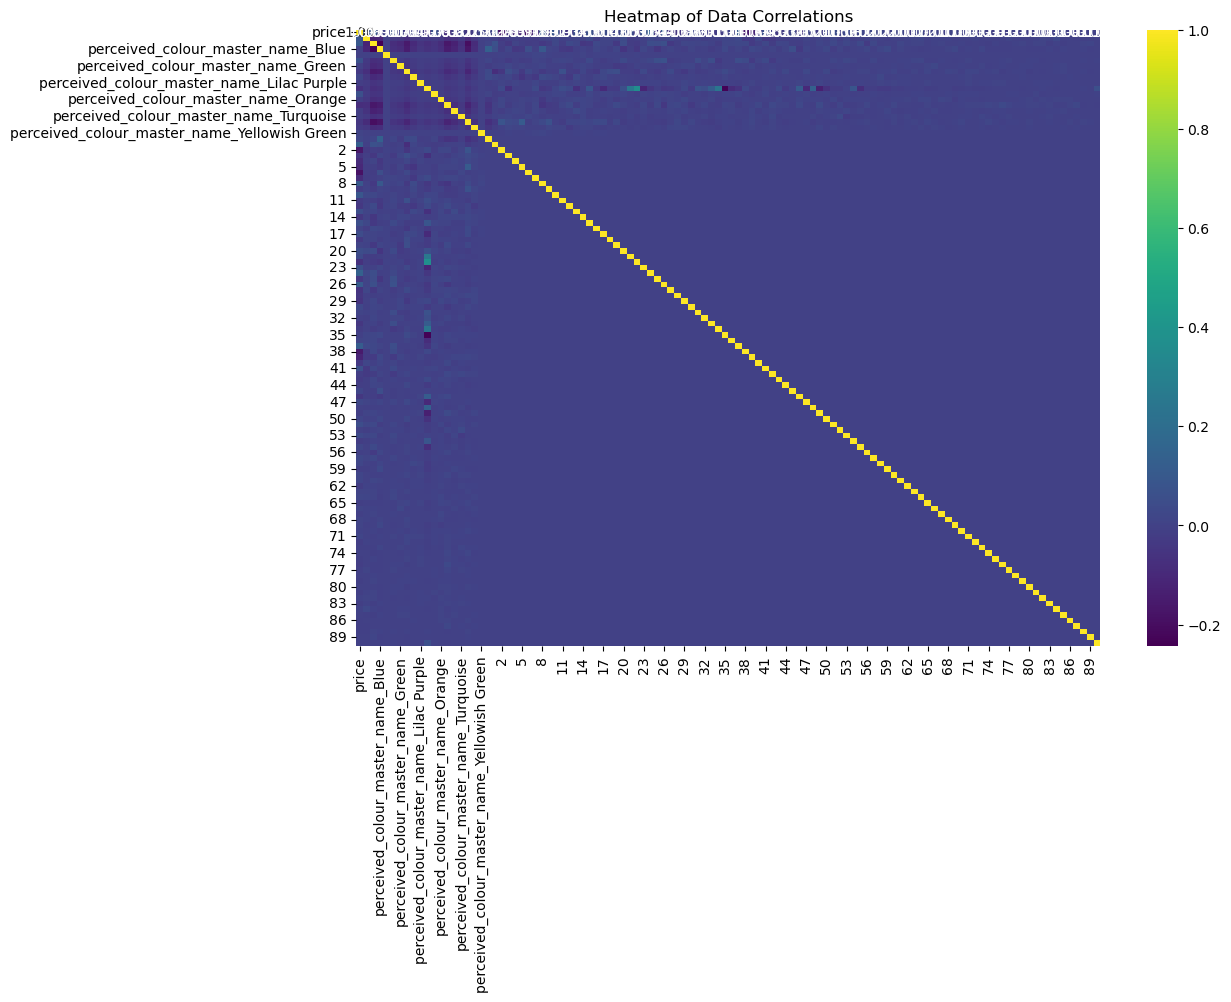

In [12]:
# Create a heatmap for the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Data Correlations')
plt.show()

# Define features and target variable

In [13]:
# Define features and target variable
features = heatmap_df.drop('price', axis=1)
target = heatmap_df['price']

# Split the data into training and testing sets

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

# Ensure all column names are strings

In [15]:
# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize the MinMaxScaler and fit it to the training data

In [16]:
# Initialize the MinMaxScaler and fit it to the training data
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

# Transform the training and testing data

In [17]:
# Transform the training and testing data
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Transform columns to numeric for KNN

In [18]:
# Transform columns to numeric for KNN
for i in X_train.columns:
    X_train[i] = X_train[i].astype(int)
for i in X_test.columns:
    X_test[i] = X_test[i].astype(int)

# Transform the training and testing data again

In [19]:
# Transform the training and testing data again
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Testing the models

## Initialize the models

In [20]:
# Initialize the models
models = {
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Bagging': BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42),
    'SVM': SVR()
}

## Train and evaluate the models

In [21]:
# Train and evaluate the models
results = []

for model_name, model in models.items():
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(X_test_norm)
    
    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_standardized = r2_score(y_test, y_pred)
    
    # Store the results
    results.append({
        'Model': model_name,
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'R-squared': r2_standardized
    })

/home/danicoco/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Convert and print the results to DataFrame

In [22]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

               Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0                KNN                   0.013167                  0.000539   
1      Random Forest                   0.012079                  0.000475   
2  Gradient Boosting                   0.012429                  0.000490   
3            Bagging                   0.012095                  0.000475   
4                SVM                   0.076734                  0.006200   

   R-squared  
0   0.197233  
1   0.292370  
2   0.269941  
3   0.291828  
4  -8.238362  


# Find the best performing model based on R-squared

In [23]:
# Find the best performing model based on R-squared
best_model = results_df.loc[results_df['R-squared'].idxmax()]
print("\nBest performing model:")
print(best_model)


Best performing model:
Model                        Random Forest
Mean Absolute Error (MAE)         0.012079
Mean Squared Error (MSE)          0.000475
R-squared                          0.29237
Name: 1, dtype: object


# Visual comparison

               Model       MAE       MSE  R2 Score
0                KNN  0.013167  0.000539  0.197233
1      Random Forest  0.012079  0.000475  0.292370
2  Gradient Boosting  0.012429  0.000490  0.269941
3            Bagging  0.012095  0.000475  0.291828
4                SVM  0.076734  0.006200 -8.238362


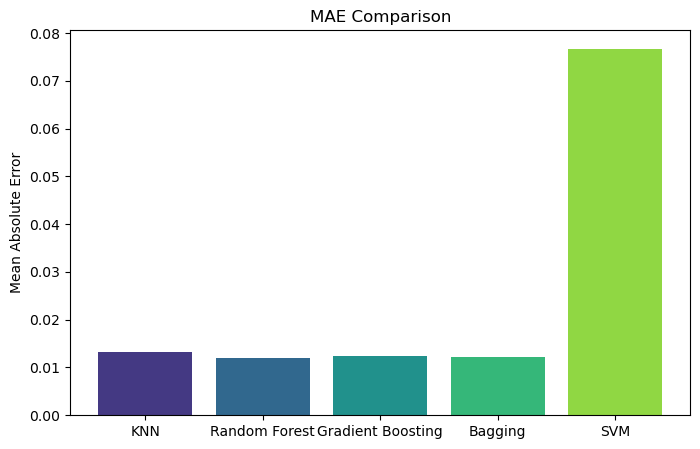

<Figure size 640x480 with 0 Axes>

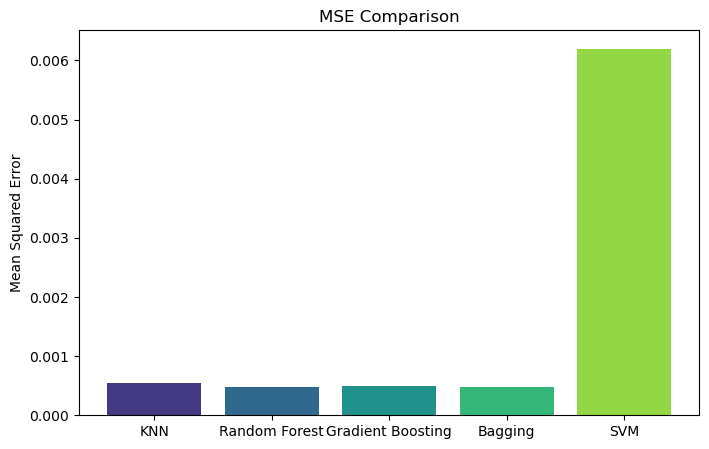

<Figure size 640x480 with 0 Axes>

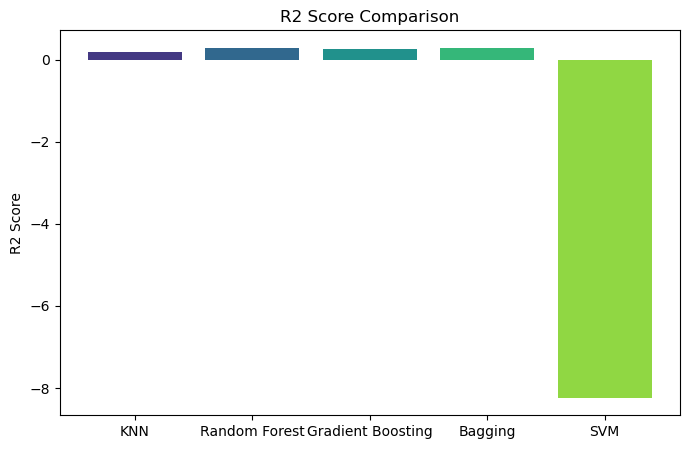

<Figure size 640x480 with 0 Axes>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a summary dataframe for the results
results = {
    'Model': ['KNN', 'Random Forest', 'Gradient Boosting', 'Bagging', 'SVM'],
    'MAE': [0.013167, 0.012079, 0.012429, 0.012095, 0.076734],
    'MSE': [0.000539, 0.000475, 0.000490, 0.000475, 0.006200],
    'R2 Score': [0.197233, 0.292370, 0.269941, 0.291828, -8.238362]
}

results_df = pd.DataFrame(results)

# Display the summary table
print(results_df)

# Define colors using the viridis palette
colors = sns.color_palette("viridis", len(results_df))

# Plot MAE
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['MAE'], color=colors)
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error')
plt.show()
#save the chart as a png file
plt.savefig('../Data/Charts/MAE.png')

# Plot MSE
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['MSE'], color=colors)
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.show()
#save the chart as a png file
plt.savefig('../Data/Charts/MSE.png')

# Plot R2 Score
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['R2 Score'], color=colors)
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.show()
#save the chart as a png file
plt.savefig('../Data/Charts/R2.png')



# Analysis
## Mean Absolute Error (MAE) Analysis:

The Random Forest model has the lowest MAE (0.012079), followed closely by the Bagging and Gradient Boosting models. This indicates that these models have the smallest average errors in their predictions.
The KNN model has a slightly higher MAE (0.013167), but it is still reasonably close to the other top models.
The SVM model performs poorly with a significantly higher MAE (0.076734), indicating that its predictions are less accurate on average compared to the other models.

## Mean Squared Error (MSE) Analysis:

Similar to the MAE results, the Random Forest and Bagging models have the lowest MSE (0.000475), suggesting they have the smallest average squared errors.
The Gradient Boosting model follows closely with an MSE of 0.000490.
The KNN model has a slightly higher MSE (0.000539), but it is still close to the top-performing models.
The SVM model again performs poorly with an MSE of 0.006200, indicating higher variability in its prediction errors.

## R2 Score Analysis:

The Random Forest model has the highest R2 score (0.292370), meaning it explains the highest proportion of the variance in the target variable.
The Bagging model follows closely with an R2 score of 0.291828, and the Gradient Boosting model has an R2 score of 0.269941.
The KNN model has a lower R2 score (0.197233), indicating it explains less variance compared to the other top models.
The SVM model has a significantly negative R2 score (-8.238362), indicating it performs worse than a horizontal line (mean prediction), which suggests it is not a suitable model for this dataset.
Conclusion
The Random Forest model is the best-performing model overall, with the lowest MAE and MSE and the highest R2 score.
Bagging and Gradient Boosting models also perform well, showing competitive MAE, MSE, and R2 scores.
The KNN model performs reasonably well but is slightly less accurate compared to the ensemble models.
The SVM model performs poorly in all metrics, indicating it is not suitable for this particular regression problem.
This analysis suggests focusing on ensemble methods like Random Forest and Bagging for better prediction accuracy in this dataset.